In [1]:
#importing libraries
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
#data loading
data = pd.read_csv("D:\chronic kidney disease\chronickidneydisease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
#drop id column
data.drop(["id"],axis=1,inplace=True)

In [7]:
#renaming column names
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
data.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']

In [9]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [10]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
#summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age                        391 non-null float64
blood_pressure             388 non-null float64
specific_gravity           353 non-null float64
albumin                    354 non-null float64
sugar                      351 non-null float64
red_blood_cells            248 non-null object
pus_cell                   335 non-null object
pus_cell_clumps            396 non-null object
bacteria                   396 non-null object
blood glucose random       356 non-null float64
blood_urea                 381 non-null float64
serum_creatinine           383 non-null float64
sodium                     313 non-null float64
potassium                  312 non-null float64
hemoglobin                 348 non-null float64
packed_cell_volume         330 non-null object
white_blood_cell_count     295 non-null object
red_blood_cell_count       270 non-null object
hypertension               398 non-nul

In [12]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
#target column
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [14]:
#rectifying target column
data['class']=data['class'].replace("ckd\t","ckd")
data["class"].unique()

array(['ckd', 'notckd'], dtype=object)

In [15]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object),
 array([11, 14], dtype=int64))

In [16]:
#catagorical columns
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cell_count', 'coronary_artery_disease', 'appetite', 'hypertension', 'diabetesmellitus', 'white_blood_cell_count', 'anemia', 'packed_cell_volume', 'class', 'pedal_edema', 'pus_cell_clumps', 'red_blood_cells', 'bacteria', 'pus_cell'}


In [17]:
for i in catcols:
    print("columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

columns: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})
************************************************************************************************************************

columns: coronary_artery_disease
Counter({'no': 362, 'yes': 34, '\tno': 2, nan: 2})
************************************************************************************************************************

columns: appetite
Counter({'good': 317, 'poor': 82, nan: 1})
***********************************************************************

In [18]:
#removing the columns which are not catagorical
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'coronary_artery_disease', 'appetite', 'hypertension', 'diabetesmellitus', 'anemia', 'class', 'pedal_edema', 'pus_cell_clumps', 'red_blood_cells', 'bacteria', 'pus_cell'}


In [19]:
#numerical columns
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'blood glucose random', 'specific_gravity', 'blood_pressure', 'potassium', 'hemoglobin', 'age', 'blood_urea', 'albumin', 'sodium', 'serum_creatinine', 'sugar'}


In [20]:
for i in contcols:
    print("continous columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

continous columns: blood glucose random
Counter({99.0: 10, 100.0: 9, 93.0: 9, 107.0: 8, 117.0: 6, 140.0: 6, 92.0: 6, 109.0: 6, 131.0: 6, 130.0: 6, 70.0: 5, 114.0: 5, 95.0: 5, 123.0: 5, 124.0: 5, 102.0: 5, 132.0: 5, 104.0: 5, 125.0: 5, 122.0: 5, 121.0: 4, 106.0: 4, 76.0: 4, 91.0: 4, 129.0: 4, 133.0: 4, 94.0: 4, 88.0: 4, 118.0: 4, 139.0: 4, 111.0: 4, 113.0: 4, 120.0: 4, 119.0: 4, 74.0: 3, 108.0: 3, 171.0: 3, 137.0: 3, 79.0: 3, 150.0: 3, 112.0: 3, 127.0: 3, 219.0: 3, 172.0: 3, 89.0: 3, 128.0: 3, 214.0: 3, 105.0: 3, 78.0: 3, 103.0: 3, 82.0: 3, 97.0: 3, 81.0: 3, 138.0: 2, 490.0: 2, 208.0: 2, 98.0: 2, 204.0: 2, 207.0: 2, 144.0: 2, 253.0: 2, 141.0: 2, 86.0: 2, 360.0: 2, 163.0: 2, 158.0: 2, 165.0: 2, 169.0: 2, 210.0: 2, 101.0: 2, 153.0: 2, 213.0: 2, 424.0: 2, 303.0: 2, 192.0: 2, 80.0: 2, 110.0: 2, 96.0: 2, 85.0: 2, 83.0: 2, 75.0: 2, nan: 1, 423.0: 1, 410.0: 1, 380.0: 1, 157.0: 1, 263.0: 1, 173.0: 1, nan: 1, nan: 1, nan: 1, 156.0: 1, 264.0: 1, nan: 1, 159.0: 1, 270.0: 1, nan: 1, nan: 1, nan: 1,

In [21]:
#removing the columns which are not numerical
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'blood glucose random', 'blood_pressure', 'potassium', 'hemoglobin', 'age', 'blood_urea', 'sodium', 'serum_creatinine'}


In [22]:
#adding columns which we found continous
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'blood glucose random', 'red_blood_cell_count', 'blood_pressure', 'potassium', 'hemoglobin', 'age', 'blood_urea', 'white_blood_cell_count', 'packed_cell_volume', 'sodium', 'serum_creatinine'}


In [23]:
#adding columns which we found numerical
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'sugar', 'specific_gravity', 'coronary_artery_disease', 'appetite', 'hypertension', 'diabetesmellitus', 'albumin', 'anemia', 'class', 'pedal_edema', 'pus_cell_clumps', 'red_blood_cells', 'bacteria', 'pus_cell'}


In [24]:
#rectifying the catagorical column classes
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [25]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [26]:
#null values
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [27]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [28]:
#converting columns into numeric types
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count =  pd.to_numeric(data.white_blood_cell_count, errors ='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [29]:
#handiling numerical/continous column null values
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [30]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [31]:
data.isnull().sum().sum()

0

In [32]:
#label encoding
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
 'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [33]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i]=LEi.fit_transform(data[i])
    print(c(data[i]))
    print('*'*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

### Data visualization

Text(0.5, 1.0, 'age vs blood scatter plot')

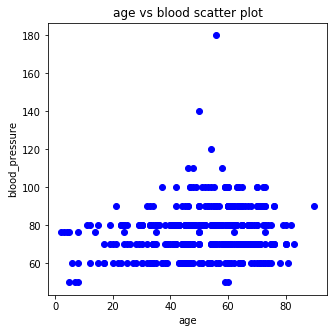

In [34]:
#Age vs Blood pressure
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age vs blood scatter plot")

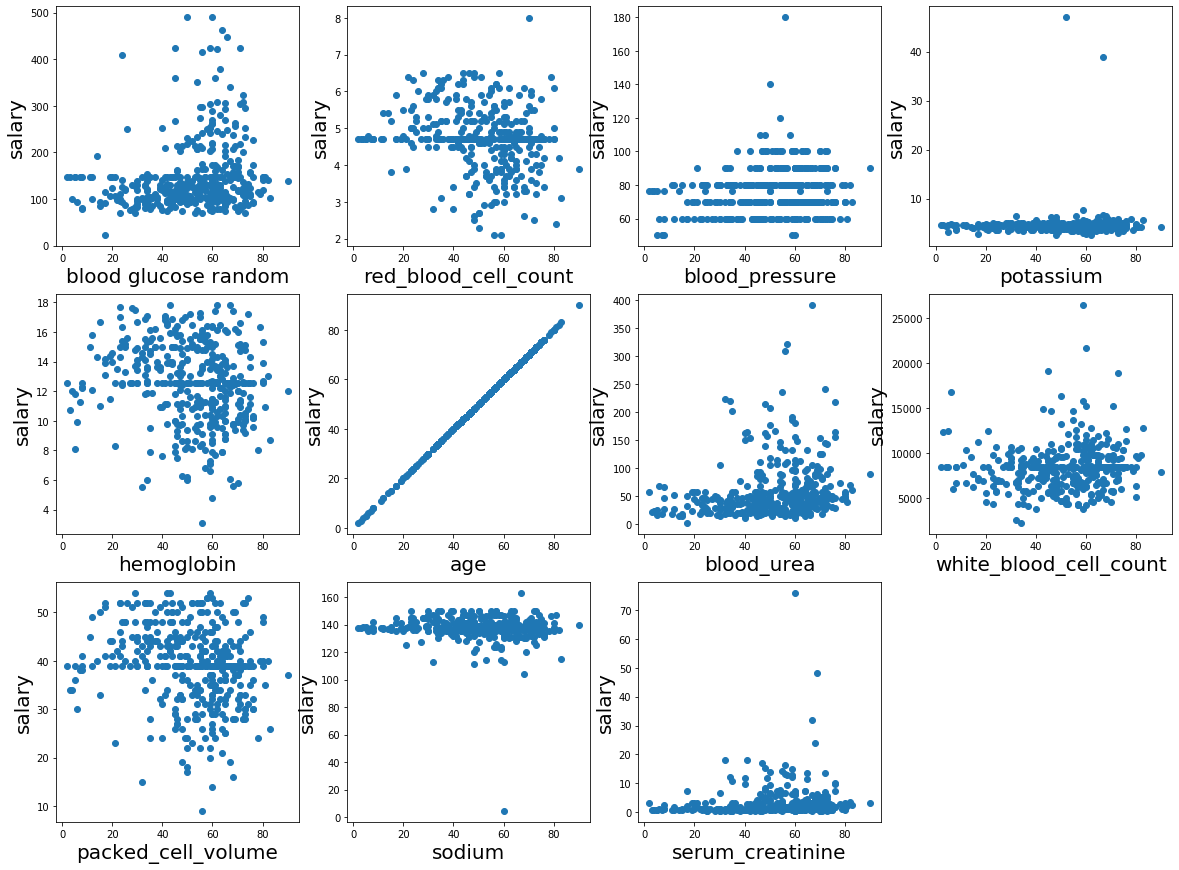

In [35]:
#Age vs all continous columns
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in contcols:
    if plotnumber<=11 :
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('salary',fontsize=20)
    plotnumber+=1
plt.show()

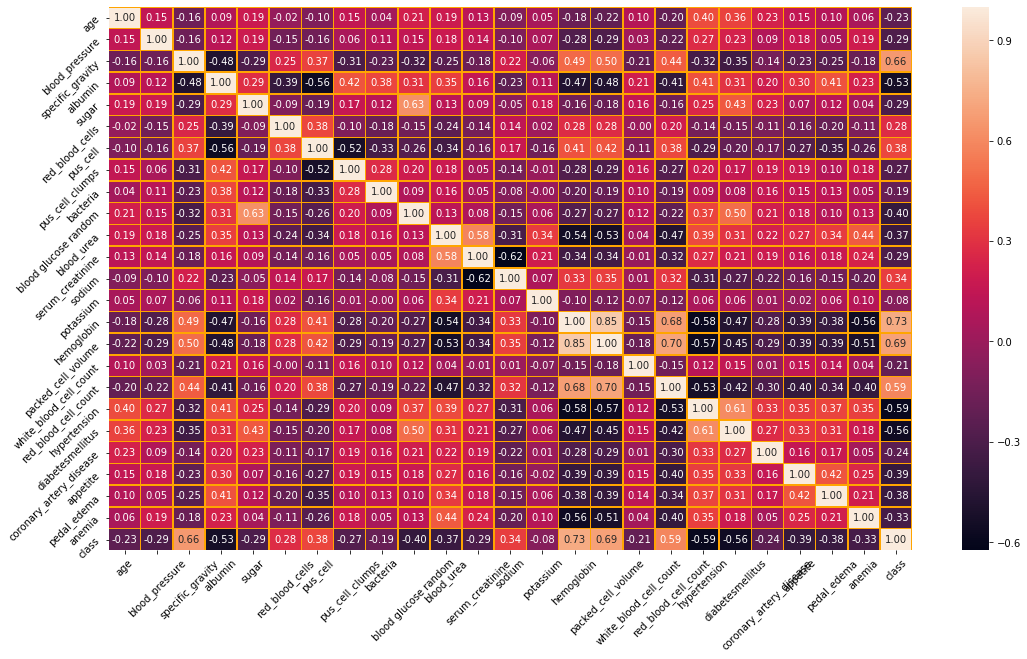

In [36]:
#finding correlation between the independent columns
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

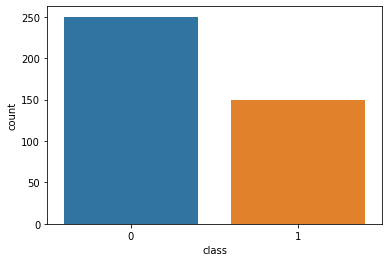

In [37]:
#class
sns.countplot(data['class'])

In [38]:
#creating independent and dependent
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [39]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [40]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
#test the model
y_pred = lgr.predict(x_test)

In [42]:
y_pred1 = lgr.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
c(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0]


Counter({0: 48, 1: 32})

In [43]:
#model evaluation
accuracy_score(y_test,y_pred)

0.925

In [44]:
#confustion matrix of our model
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[48,  6],
       [ 0, 26]], dtype=int64)

In [45]:
#save the model
pickle.dump(lgr, open('CKD.pkl','wb'))